<a href="https://colab.research.google.com/github/mitsu666/DataScienceLecture/blob/master/DataScienceLecture4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. データ加工と処理

In [0]:
#pandasモジュール読み込み
import pandas as pd
#numpyモジュール読み込み
import numpy as np
#画面の表示大きくするおまじない
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 100
#titanicデータ読み込み
df = pd.read_csv('train.csv')

## 1.1. 欠損処理

In [3]:
#欠損があるかどうか テーブル全体True/False
print (df.isnull())

     PassengerId  Survived  Pclass   Name  ...  Ticket   Fare  Cabin  Embarked
0          False     False   False  False  ...   False  False   True     False
1          False     False   False  False  ...   False  False  False     False
2          False     False   False  False  ...   False  False   True     False
3          False     False   False  False  ...   False  False  False     False
4          False     False   False  False  ...   False  False   True     False
..           ...       ...     ...    ...  ...     ...    ...    ...       ...
886        False     False   False  False  ...   False  False   True     False
887        False     False   False  False  ...   False  False  False     False
888        False     False   False  False  ...   False  False   True     False
889        False     False   False  False  ...   False  False  False     False
890        False     False   False  False  ...   False  False   True     False

[891 rows x 12 columns]


In [4]:
#欠損を含んだ行か？　True/False
print (df.isnull().any(axis=1))

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Length: 891, dtype: bool


In [5]:
#欠損を含んだ列か？　True/False
print (df.isnull().any(axis=0))

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


In [6]:
#欠損がある行を抜き出す
print (df[df.isnull().any(axis=1)])

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
2              3         1       3  ...   7.9250   NaN         S
4              5         0       3  ...   8.0500   NaN         S
5              6         0       3  ...   8.4583   NaN         Q
7              8         0       3  ...  21.0750   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
884          885         0       3  ...   7.0500   NaN         S
885          886         0       3  ...  29.1250   NaN         Q
886          887         0       2  ...  13.0000   NaN         S
888          889         0       3  ...  23.4500   NaN         S
890          891         0       3  ...   7.7500   NaN         Q

[708 rows x 12 columns]


In [7]:
#行ごとの欠損数をカウントする
print (df.isnull().sum(axis=1))

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [8]:
#列ごとの欠損数をカウントする
print (df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
#欠損を含む行を落とす
print (df.dropna())

     PassengerId  Survived  Pclass  ...     Fare        Cabin  Embarked
1              2         1       1  ...  71.2833          C85         C
3              4         1       1  ...  53.1000         C123         S
6              7         0       1  ...  51.8625          E46         S
10            11         1       3  ...  16.7000           G6         S
11            12         1       1  ...  26.5500         C103         S
..           ...       ...     ...  ...      ...          ...       ...
871          872         1       1  ...  52.5542          D35         S
872          873         0       1  ...   5.0000  B51 B53 B55         S
879          880         1       1  ...  83.1583          C50         C
887          888         1       1  ...  30.0000          B42         S
889          890         1       1  ...  30.0000         C148         C

[183 rows x 12 columns]


In [10]:
#0で埋める
df.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
#Ageを平均で埋める
print (df.fillna({'Age':np.mean(df.Age)}))

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


In [12]:
#Cabinを最頻値で埋める(mode=最頻値メソッド 数値ではないためこちらを使う)
print (df.fillna({'Cabin':df.Cabin.mode()[0]})) #複数あるため0番地を取得

     PassengerId  Survived  Pclass  ...     Fare    Cabin  Embarked
0              1         0       3  ...   7.2500  B96 B98         S
1              2         1       1  ...  71.2833      C85         C
2              3         1       3  ...   7.9250  B96 B98         S
3              4         1       1  ...  53.1000     C123         S
4              5         0       3  ...   8.0500  B96 B98         S
..           ...       ...     ...  ...      ...      ...       ...
886          887         0       2  ...  13.0000  B96 B98         S
887          888         1       1  ...  30.0000      B42         S
888          889         0       3  ...  23.4500  B96 B98         S
889          890         1       1  ...  30.0000     C148         C
890          891         0       3  ...   7.7500  B96 B98         Q

[891 rows x 12 columns]


In [13]:
#両方一気に行う
print (df.fillna({'Age':np.mean(df.Age),'Cabin':df.Cabin.mode()[0]}))

     PassengerId  Survived  Pclass  ...     Fare    Cabin  Embarked
0              1         0       3  ...   7.2500  B96 B98         S
1              2         1       1  ...  71.2833      C85         C
2              3         1       3  ...   7.9250  B96 B98         S
3              4         1       1  ...  53.1000     C123         S
4              5         0       3  ...   8.0500  B96 B98         S
..           ...       ...     ...  ...      ...      ...       ...
886          887         0       2  ...  13.0000  B96 B98         S
887          888         1       1  ...  30.0000      B42         S
888          889         0       3  ...  23.4500  B96 B98         S
889          890         1       1  ...  30.0000     C148         C
890          891         0       3  ...   7.7500  B96 B98         Q

[891 rows x 12 columns]


In [14]:
#上の処理だけでは実はdfは更新されていない
df_copy = df.copy()
print (df_copy)

#更新するには代入する
df_copy = df_copy.fillna({'Age':np.mean(df_copy.Age),'Cabin':df_copy.Cabin.mode()[0]})

#以下のやりかたでもOK
df_copy = df.copy()
print (df_copy)

df_copy.fillna({'Age':np.mean(df_copy.Age),'Cabin':df_copy.Cabin.mode()[0]},inplace=True)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C


##1.2. 重複処理

In [15]:
df = pd.DataFrame({'ID': ['1001', '1002','1003'] * 3 + ['1004']+['1005'],
                     'PurchaseItem': [1, 1, 2, 1, 1, 1,2, 3, 1, 3, 2]})
print (df)

      ID  PurchaseItem
0   1001             1
1   1002             1
2   1003             2
3   1001             1
4   1002             1
5   1003             1
6   1001             2
7   1002             3
8   1003             1
9   1004             3
10  1005             2


### 重複場所

In [16]:
#重複している行抽出（一番後ろのみ）
#boole値
print (df.duplicated())
#booleで参照
print (df[df.duplicated()])

0     False
1     False
2     False
3      True
4      True
5     False
6     False
7     False
8      True
9     False
10    False
dtype: bool
     ID  PurchaseItem
3  1001             1
4  1002             1
8  1003             1


In [17]:
#重複している行抽出（一番初めのみ）
#boole値
print (df.duplicated(keep='last'))
#booleで参照
print (df[df.duplicated(keep='last')])

0      True
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9     False
10    False
dtype: bool
     ID  PurchaseItem
0  1001             1
1  1002             1
5  1003             1


In [18]:
#重複している行抽出 全部
#boole値
print (df.duplicated(keep=False))
#booleで参照
print (df[df.duplicated(keep=False)])

0      True
1      True
2     False
3      True
4      True
5      True
6     False
7     False
8      True
9     False
10    False
dtype: bool
     ID  PurchaseItem
0  1001             1
1  1002             1
3  1001             1
4  1002             1
5  1003             1
8  1003             1


### 重複落とす

In [19]:
#重複している行を削除
df.drop_duplicates()

,ID,PurchaseItem
0,1001,1
1,1002,1
2,1003,2
5,1003,1
6,1001,2
7,1002,3
9,1004,3
10,1005,2


In [20]:
#先ほどと同じく上の処理ではdfは更新されないため
df_copy = df.copy()
df_copy.drop_duplicates(inplace=True)

print (df_copy)

      ID  PurchaseItem
0   1001             1
1   1002             1
2   1003             2
5   1003             1
6   1001             2
7   1002             3
9   1004             3
10  1005             2


#2. 色々な関数を適用する

##2.1 文字列関数（メソッド）の適用

In [21]:
#再びtitanic読み込み
df = pd.read_csv('train.csv')

#文字列確認
print (df.dtypes)

#Name
print (df.Name)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object


### LOWER()/UPPER() 大文字小文字変換

In [22]:
#小文字に変える
print (df.Name.str.lower())

#大文字に変える
print (df.Name.str.upper())

0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object
0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                 

### SPLIT() 分割

In [23]:
#,で分割
print (df.Name.str.split(",")) #分割したものはリストで返ってくる

#Firstネームだけ取得 分割した後に再度getを使う
print (df.Name.str.split(",").str.get(0))

#分割結果をデータフレームとして返す expandオプションをTrueにする
print (df.Name.str.split(',',expand=True))

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object
0         Braund
1        Cumings
2      Heikkinen
3       Futrelle
4          Allen
         ...    
886     Montvila
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: Name, Length: 891, dtype: object
             0                                            1
0       Braund                              Mr. 

### REPLACE() 置換

In [24]:
#,をハイフンで置き換える replaceメソッド
df.Name.str.replace(',',('-'))

0                                Braund- Mr. Owen Harris
1      Cumings- Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen- Miss. Laina
3           Futrelle- Mrs. Jacques Heath (Lily May Peel)
4                               Allen- Mr. William Henry
                             ...                        
886                                Montvila- Rev. Juozas
887                         Graham- Miss. Margaret Edith
888             Johnston- Miss. Catherine Helen "Carrie"
889                                Behr- Mr. Karl Howell
890                                  Dooley- Mr. Patrick
Name: Name, Length: 891, dtype: object

### CAT() 文字列結合

In [26]:
data = pd.DataFrame({'PrefName':['東京','神奈川','埼玉','千葉','愛知'],
              'CityName':['新宿','川崎','大宮','浦安','名古屋']})
print (data)

data.PrefName.str.cat(data.CityName)



  PrefName CityName
0       東京       新宿
1      神奈川       川崎
2       埼玉       大宮
3       千葉       浦安
4       愛知      名古屋
0      False
1      False
2       True
3      False
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: Name, Length: 891, dtype: bool
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
2              3         1       3  ...   7.9250   NaN         S
10            11         1       3  ...  16.7000    G6         S
11            12         1       1  ...  26.5500  C103         S
14            15         0       3  ...   7.8542   NaN         S
22            23         1       3  ...   8.0292   NaN         Q
..           ...       ...     ...  ...      ...   ...       ...
866          867         1       2  ...  13.8583   NaN         C
875          876         1       3  ...   7.2250   NaN         C
882          883         0       3  ...  10.5167   NaN         S
887          888         1       1  ...  30.0000  

In [27]:
#contains()文字列が含まれるか？

#Miss(未婚女性)という文字列が含まれるか？
print (df.Name.str.contains('Miss'))

#Miss含まれるもの抽出
print (df[df.Name.str.contains('Miss')])

#性別データと矛盾ないか確認
print (df[df.Name.str.contains('Miss')].Sex.value_counts())

0      False
1      False
2       True
3      False
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: Name, Length: 891, dtype: bool
     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
2              3         1       3  ...   7.9250   NaN         S
10            11         1       3  ...  16.7000    G6         S
11            12         1       1  ...  26.5500  C103         S
14            15         0       3  ...   7.8542   NaN         S
22            23         1       3  ...   8.0292   NaN         Q
..           ...       ...     ...  ...      ...   ...       ...
866          867         1       2  ...  13.8583   NaN         C
875          876         1       3  ...   7.2250   NaN         C
882          883         0       3  ...  10.5167   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S

[182 rows x 12 columns]
female    182
N

### ZFILL ゼロ埋め

In [28]:
#文字列ID作成
data = pd.DataFrame({'ID':np.arange(100)}).astype(str)

#IDでソートする
print (data.ID.sort_values())

0      0
1      1
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
2      2
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
3      3
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
4      4
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
5      5
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
58    58
59    59
6      6
60    60
61    61
62    62
63    63
64    64
65    65
66    66
67    67
68    68
69    69
7      7
70    70
71    71
72    72
73    73
74    74
75    75
76    76
77    77
78    78
79    79
8      8
80    80
81    81
82    82
83    83
84    84
85    85
86    86
87    87
88    88
89    89
9      9
90    90
91    91
92    92
93    93
94    94
95    95
96    96
97    97
98    98
99    99
Name: ID, dtype: object


In [29]:
#左側を0埋めする
print (data.ID.str.zfill(2))

#IDでソートする
print (data.ID.str.zfill(2).sort_values())

0     00
1     01
2     02
3     03
4     04
5     05
6     06
7     07
8     08
9     09
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
28    28
29    29
30    30
31    31
32    32
33    33
34    34
35    35
36    36
37    37
38    38
39    39
40    40
41    41
42    42
43    43
44    44
45    45
46    46
47    47
48    48
49    49
50    50
51    51
52    52
53    53
54    54
55    55
56    56
57    57
58    58
59    59
60    60
61    61
62    62
63    63
64    64
65    65
66    66
67    67
68    68
69    69
70    70
71    71
72    72
73    73
74    74
75    75
76    76
77    77
78    78
79    79
80    80
81    81
82    82
83    83
84    84
85    85
86    86
87    87
88    88
89    89
90    90
91    91
92    92
93    93
94    94
95    95
96    96
97    97
98    98
99    99
Name: ID, dtype: object
0     00
1     01
2     02
3     03
4     04
5     05
6     06
7     07
8   

## 2.2 データフレーム要素への数値関数適用

In [0]:
#GDP/一人当たりGDP (100万ドル)
data = np.array([[4892255,38313],
                [1281330,1085],
                [510504,2246],
                [931405,19343],
                [475094	,18853],
                 [188261	,40793],
                  [272429	,4043],
                  [4416104,	3360],
                  [730325	,9881],
                  [146068	,825],
                  [79568	,497],
                  [167479	,1854],
                  [215354	,30843],
                  [221437	,8197]])

gdp = pd.DataFrame(data,columns=['GDP','GDP/pop'],
             index=['日本' ,'インド' ,'インドネシア','韓国', 'サウジアラビア','シンガポール', 'タイ',
'中国','トルコ', 'パキスタン','バングラデシュ', 'フィリピン','香港', 'マレーシア'])

In [31]:
#対数関数
print (np.log(gdp))
#指数関数
print (np.exp(1/gdp)) #gdpが大きい数になりすぐるためその逆数

               GDP    GDP/pop
日本       15.403164  10.553545
インド      14.063409   6.989335
インドネシア   13.143154   7.716906
韓国       13.744449   9.870086
サウジアラビア  13.071268   9.844427
シンガポール   12.145585  10.616266
タイ       12.515133   8.304742
中国       15.300768   8.119696
トルコ      13.501245   9.198369
パキスタン    11.891828   6.715383
バングラデシュ  11.284367   6.208590
フィリピン    12.028613   7.525101
香港       12.280038  10.336665
マレーシア    12.307893   9.011524
              GDP   GDP/pop
日本       1.000000  1.000026
インド      1.000001  1.000922
インドネシア   1.000002  1.000445
韓国       1.000001  1.000052
サウジアラビア  1.000002  1.000053
シンガポール   1.000005  1.000025
タイ       1.000004  1.000247
中国       1.000000  1.000298
トルコ      1.000001  1.000101
パキスタン    1.000007  1.001213
バングラデシュ  1.000013  1.002014
フィリピン    1.000006  1.000540
香港       1.000005  1.000032
マレーシア    1.000005  1.000122



## 2.3 自作関数を適用する

### 引数が1つ

In [33]:
#成人/未成年
def seinen(age):
  if age>=20:
    return("成人")
  else:
    return("未成年")

#シリーズに対してmapメソッドで適用
df.Age.map(seinen) #mapメソッド内ではseinen関数の()は省略

0       成人
1       成人
2       成人
3       成人
4       成人
      ... 
886     成人
887    未成年
888    未成年
889     成人
890     成人
Name: Age, Length: 891, dtype: object

### 引数が複数*

In [0]:
#rfm関数定義
def rfm(f,m):
  if (f<=5) & (m<=5000):
    return ('③')
  elif (f>5) & (m<=5000):
    return ('①')
  elif (f>5) & (m>5000):
    return ('②')
  else:
    return ('④')

In [35]:
#購買データ作成
koubai = pd.DataFrame({'Fred':[3,5,7,9],
                       'Money': [5000,15000,3000,12000]})
print (koubai)

   Fred  Money
0     3   5000
1     5  15000
2     7   3000
3     9  12000


In [36]:
#これだとエラーが出る
koubai.apply(rfm))

SyntaxError: ignored

In [37]:
#lambda式を使用して以下のように実行
koubai.apply(lambda x:rfm(x[0],x[1]),axis=1)

0    ③
1    ④
2    ①
3    ②
dtype: object

# 3.データラングリング

## 3.1.データ結合

In [39]:
#salesデータ読み込む
sales = pd.read_csv('sales201907.csv',engine='python',encoding='cp932')
print (sales)

    顧客ID      購買日時 商品名  数量   金額      更新日時
0  10001  2019/7/1   A   1  100  2019/7/1
1  10001  2019/7/1   B   2  300  2019/7/1
2  10002  2019/7/1   A   2  200  2019/7/1
3  10002  2019/7/1   B   2  300  2019/7/1
4  10002  2019/7/1   C   1  200  2019/7/1
5  10003  2019/7/1   D   1  250  2019/7/1


In [53]:
#属性データ読み込む
zokusei = pd.read_csv('zokusei.csv',engine='python',encoding='cp932')
print (zokusei)

    顧客ID        生年月日  性別  都道府県  市区町村
0  10001   1982/2/25   1  神奈川県   川崎市
1  10002    1991/8/2   1   埼玉県   朝霞市
2  10003  1976/10/21   1  神奈川県  相模原市
3  10004   1999/1/22   2   千葉県   千葉市


### MERGE() 横結合する

In [41]:
#顧客IDでマージする
pd.merge(zokusei,sales)

,顧客ID,生年月日,性別,都道府県,市区町村,購買日時,商品名,数量,金額,更新日時
0,10001,1982/2/25,1,神奈川県,川崎市,2019/7/1,A,1,100,2019/7/1
1,10001,1982/2/25,1,神奈川県,川崎市,2019/7/1,B,2,300,2019/7/1
2,10002,1991/8/2,1,埼玉県,朝霞市,2019/7/1,A,2,200,2019/7/1
3,10002,1991/8/2,1,埼玉県,朝霞市,2019/7/1,B,2,300,2019/7/1
4,10002,1991/8/2,1,埼玉県,朝霞市,2019/7/1,C,1,200,2019/7/1
5,10003,1976/10/21,1,神奈川県,相模原市,2019/7/1,D,1,250,2019/7/1


In [54]:
#キーが異なる場合
zokusei.rename(columns={'顧客ID':'kokyakuID'},inplace=True)
print (zokusei)

#キーが異なる場合、left_on/right_onで明示的に書く
print (pd.merge(zokusei,sales,left_on='kokyakuID',right_on='顧客ID'))

   kokyakuID        生年月日  性別  都道府県  市区町村
0      10001   1982/2/25   1  神奈川県   川崎市
1      10002    1991/8/2   1   埼玉県   朝霞市
2      10003  1976/10/21   1  神奈川県  相模原市
3      10004   1999/1/22   2   千葉県   千葉市
   kokyakuID        生年月日  性別  都道府県  市区町村      購買日時 商品名  数量   金額      更新日時
0      10001   1982/2/25   1  神奈川県   川崎市  2019/7/1   A   1  100  2019/7/1
1      10001   1982/2/25   1  神奈川県   川崎市  2019/7/1   B   2  300  2019/7/1
2      10002    1991/8/2   1   埼玉県   朝霞市  2019/7/1   A   2  200  2019/7/1
3      10002    1991/8/2   1   埼玉県   朝霞市  2019/7/1   B   2  300  2019/7/1
4      10002    1991/8/2   1   埼玉県   朝霞市  2019/7/1   C   1  200  2019/7/1
5      10003  1976/10/21   1  神奈川県  相模原市  2019/7/1   D   1  250  2019/7/1


In [55]:
#外部結合
pd.merge(zokusei,sales,left_on='kokyakuID',right_on='顧客ID',how='outer')

,kokyakuID,生年月日,性別,都道府県,市区町村,購買日時,商品名,数量,金額,更新日時
0,10001,1982/2/25,1,神奈川県,川崎市,2019/7/1,A,1.0,100.0,2019/7/1
1,10001,1982/2/25,1,神奈川県,川崎市,2019/7/1,B,2.0,300.0,2019/7/1
2,10002,1991/8/2,1,埼玉県,朝霞市,2019/7/1,A,2.0,200.0,2019/7/1
3,10002,1991/8/2,1,埼玉県,朝霞市,2019/7/1,B,2.0,300.0,2019/7/1
4,10002,1991/8/2,1,埼玉県,朝霞市,2019/7/1,C,1.0,200.0,2019/7/1
5,10003,1976/10/21,1,神奈川県,相模原市,2019/7/1,D,1.0,250.0,2019/7/1
6,10004,1999/1/22,2,千葉県,千葉市,NaN,NaN,NaN,NaN,NaN


In [58]:
#インデックスでマージする
#salesデータ読み込む
sales = pd.read_csv('sales201907.csv',engine='python',encoding='cp932',index_col=0)
print (sales)

#salesはインデックスをキー zokuseiは顧客IDをキーとする
pd.merge(zokusei,sales,left_on='kokyakuID',right_index=True)


           購買日時 商品名  数量   金額      更新日時
顧客ID                                  
10001  2019/7/1   A   1  100  2019/7/1
10001  2019/7/1   B   2  300  2019/7/1
10002  2019/7/1   A   2  200  2019/7/1
10002  2019/7/1   B   2  300  2019/7/1
10002  2019/7/1   C   1  200  2019/7/1
10003  2019/7/1   D   1  250  2019/7/1


,kokyakuID,生年月日,性別,都道府県,市区町村,購買日時,商品名,数量,金額,更新日時
0,10001,1982/2/25,1,神奈川県,川崎市,2019/7/1,A,1,100,2019/7/1
0,10001,1982/2/25,1,神奈川県,川崎市,2019/7/1,B,2,300,2019/7/1
1,10002,1991/8/2,1,埼玉県,朝霞市,2019/7/1,A,2,200,2019/7/1
1,10002,1991/8/2,1,埼玉県,朝霞市,2019/7/1,B,2,300,2019/7/1
1,10002,1991/8/2,1,埼玉県,朝霞市,2019/7/1,C,1,200,2019/7/1
2,10003,1976/10/21,1,神奈川県,相模原市,2019/7/1,D,1,250,2019/7/1


### CONCAT()による結合

In [50]:
#3カ月分のデータを読み込む
sales201907 = pd.read_csv('sales201907.csv',engine='python',encoding='cp932') 
sales201908 = pd.read_csv('sales201908.csv',engine='python',encoding='cp932') 
sales201909 = pd.read_csv('sales201909.csv',engine='python',encoding='cp932')
print (sales201907)
print (sales201908)
print (sales201909)

    顧客ID      購買日時 商品名  数量   金額      更新日時
0  10001  2019/7/1   A   1  100  2019/7/1
1  10001  2019/7/1   B   2  300  2019/7/1
2  10002  2019/7/1   A   2  200  2019/7/1
3  10002  2019/7/1   B   2  300  2019/7/1
4  10002  2019/7/1   C   1  200  2019/7/1
5  10003  2019/7/1   D   1  250  2019/7/1
    顧客ID      購買日時 商品名  数量   金額      更新日時
0  10001  2019/8/1   B   1  150  2019/8/1
1  10001  2019/8/1   D   2  500  2019/8/1
2  10002  2019/8/1   A   2  200  2019/8/1
3  10002  2019/8/1   C   2  400  2019/8/1
4  10002  2019/8/1   B   2  300  2019/8/1
5  10003  2019/8/1   A   2  200  2019/8/1
6  10003  2019/8/1   B   1  150  2019/8/1
7  10003  2019/8/1   E   1  500  2019/8/1
    顧客ID      購買日時 商品名  数量    金額      更新日時
0  10001  2019/9/1   D   1   250  2019/9/1
1  10001  2019/9/1   E   2  1000  2019/9/1
2  10002  2019/9/1   A   3   300  2019/9/1
3  10003  2019/9/1   A   2   200  2019/9/1


In [51]:
#属性データ読み込む
zokusei = pd.read_csv('zokusei.csv',engine='python',encoding='cp932')
print (zokusei)

#縦に結合する
sales_all = pd.concat([sales201907,sales201908,sales201909])
print (sales_all)

    顧客ID        生年月日  性別  都道府県  市区町村
0  10001   1982/2/25   1  神奈川県   川崎市
1  10002    1991/8/2   1   埼玉県   朝霞市
2  10003  1976/10/21   1  神奈川県  相模原市
3  10004   1999/1/22   2   千葉県   千葉市
    顧客ID      購買日時 商品名  数量    金額      更新日時
0  10001  2019/7/1   A   1   100  2019/7/1
1  10001  2019/7/1   B   2   300  2019/7/1
2  10002  2019/7/1   A   2   200  2019/7/1
3  10002  2019/7/1   B   2   300  2019/7/1
4  10002  2019/7/1   C   1   200  2019/7/1
5  10003  2019/7/1   D   1   250  2019/7/1
0  10001  2019/8/1   B   1   150  2019/8/1
1  10001  2019/8/1   D   2   500  2019/8/1
2  10002  2019/8/1   A   2   200  2019/8/1
3  10002  2019/8/1   C   2   400  2019/8/1
4  10002  2019/8/1   B   2   300  2019/8/1
5  10003  2019/8/1   A   2   200  2019/8/1
6  10003  2019/8/1   B   1   150  2019/8/1
7  10003  2019/8/1   E   1   500  2019/8/1
0  10001  2019/9/1   D   1   250  2019/9/1
1  10001  2019/9/1   E   2  1000  2019/9/1
2  10002  2019/9/1   A   3   300  2019/9/1
3  10003  2019/9/1   A   2   200  2019/9/

In [59]:
#lというリストに読み込んだデータフレームを格納する
yyyymm = ['201907','201908','201909']
l = []
for i in yyyymm:
  l.append(pd.read_csv('sales'+i+'.csv',engine='python',encoding='cp932'))

#要素数3つのリスト
print (l)


#pd.concat()で縦に読み込む
print (pd.concat(l))

[    顧客ID      購買日時 商品名  数量   金額      更新日時
0  10001  2019/7/1   A   1  100  2019/7/1
1  10001  2019/7/1   B   2  300  2019/7/1
2  10002  2019/7/1   A   2  200  2019/7/1
3  10002  2019/7/1   B   2  300  2019/7/1
4  10002  2019/7/1   C   1  200  2019/7/1
5  10003  2019/7/1   D   1  250  2019/7/1,     顧客ID      購買日時 商品名  数量   金額      更新日時
0  10001  2019/8/1   B   1  150  2019/8/1
1  10001  2019/8/1   D   2  500  2019/8/1
2  10002  2019/8/1   A   2  200  2019/8/1
3  10002  2019/8/1   C   2  400  2019/8/1
4  10002  2019/8/1   B   2  300  2019/8/1
5  10003  2019/8/1   A   2  200  2019/8/1
6  10003  2019/8/1   B   1  150  2019/8/1
7  10003  2019/8/1   E   1  500  2019/8/1,     顧客ID      購買日時 商品名  数量    金額      更新日時
0  10001  2019/9/1   D   1   250  2019/9/1
1  10001  2019/9/1   E   2  1000  2019/9/1
2  10002  2019/9/1   A   3   300  2019/9/1
3  10003  2019/9/1   A   2   200  2019/9/1]
    顧客ID      購買日時 商品名  数量    金額      更新日時
0  10001  2019/7/1   A   1   100  2019/7/1
1  10001  2019/7/1   B 

## 3.2 データの集計

### GROUPBY()による集計

In [60]:
#先ほどと同じ手順でsales_all作成
yyyymm = ['201907','201908','201909']
l = []
for i in yyyymm:
  l.append(pd.read_csv('sales'+i+'.csv',engine='python',encoding='cp932'))

sales_all = pd.concat(l)
print (sales_all)

    顧客ID      購買日時 商品名  数量    金額      更新日時
0  10001  2019/7/1   A   1   100  2019/7/1
1  10001  2019/7/1   B   2   300  2019/7/1
2  10002  2019/7/1   A   2   200  2019/7/1
3  10002  2019/7/1   B   2   300  2019/7/1
4  10002  2019/7/1   C   1   200  2019/7/1
5  10003  2019/7/1   D   1   250  2019/7/1
0  10001  2019/8/1   B   1   150  2019/8/1
1  10001  2019/8/1   D   2   500  2019/8/1
2  10002  2019/8/1   A   2   200  2019/8/1
3  10002  2019/8/1   C   2   400  2019/8/1
4  10002  2019/8/1   B   2   300  2019/8/1
5  10003  2019/8/1   A   2   200  2019/8/1
6  10003  2019/8/1   B   1   150  2019/8/1
7  10003  2019/8/1   E   1   500  2019/8/1
0  10001  2019/9/1   D   1   250  2019/9/1
1  10001  2019/9/1   E   2  1000  2019/9/1
2  10002  2019/9/1   A   3   300  2019/9/1
3  10003  2019/9/1   A   2   200  2019/9/1


In [61]:
#groupby 顧客ID単位で金額集計
#合計
print (sales_all.groupby('顧客ID')['金額'].sum())
#最大
print (sales_all.groupby('顧客ID')['金額'].max())
#最小
print (sales_all.groupby('顧客ID')['金額'].min())
#平均
print (sales_all.groupby('顧客ID')['金額'].mean())
#個数
print (sales_all.groupby('顧客ID')['金額'].count())

顧客ID
10001    2300
10002    1900
10003    1300
Name: 金額, dtype: int64
顧客ID
10001    1000
10002     400
10003     500
Name: 金額, dtype: int64
顧客ID
10001    100
10002    200
10003    150
Name: 金額, dtype: int64
顧客ID
10001    383.333333
10002    271.428571
10003    260.000000
Name: 金額, dtype: float64
顧客ID
10001    6
10002    7
10003    5
Name: 金額, dtype: int64


In [62]:
#groupby 顧客ID単位で金額と数量集計
#合計
print (sales_all.groupby('顧客ID')['金額','数量'].sum())
#最大
print (sales_all.groupby('顧客ID')['金額','数量'].max())
#最小
print (sales_all.groupby('顧客ID')['金額','数量'].min())
#平均
print (sales_all.groupby('顧客ID')['金額','数量'].mean())
#個数
print (sales_all.groupby('顧客ID')['金額','数量'].count())

         金額  数量
顧客ID           
10001  2300   9
10002  1900  14
10003  1300   7
         金額  数量
顧客ID           
10001  1000   2
10002   400   3
10003   500   2
        金額  数量
顧客ID          
10001  100   1
10002  200   1
10003  150   1
               金額   数量
顧客ID                  
10001  383.333333  1.5
10002  271.428571  2.0
10003  260.000000  1.4
       金額  数量
顧客ID         
10001   6   6
10002   7   7
10003   5   5


In [63]:
#簡単に書く aggを使用する
print (sales_all.groupby('顧客ID')['金額','数量'].agg(['sum','max','min','mean','count']))


#顧客ID/購入日時で集約
print (sales_all.groupby(['顧客ID','購買日時'])['金額','数量'].agg(['sum','max','min','mean','count']))

#要約統計量
print (sales_all.groupby('顧客ID').describe(include='all'))

         金額                               数量                   
        sum   max  min        mean count sum max min mean count
顧客ID                                                           
10001  2300  1000  100  383.333333     6   9   2   1  1.5     6
10002  1900   400  200  271.428571     7  14   3   1  2.0     7
10003  1300   500  150  260.000000     5   7   2   1  1.4     5
                  金額                               数量                        
                 sum   max  min        mean count sum max min      mean count
顧客ID  購買日時                                                                   
10001 2019/7/1   400   300  100  200.000000     2   3   2   1  1.500000     2
      2019/8/1   650   500  150  325.000000     2   3   2   1  1.500000     2
      2019/9/1  1250  1000  250  625.000000     2   3   2   1  1.500000     2
10002 2019/7/1   700   300  200  233.333333     3   5   2   1  1.666667     3
      2019/8/1   900   400  200  300.000000     3   6   2   2  2.00000

### PD.PIVOT_TABLE()でピボット計算

In [64]:
#顧客IDを表側、商品名を表頭で数量の合計を計算
print (sales_all.pivot_table(index=['顧客ID'],columns='商品名',values='数量',aggfunc='sum'))

#横集計 縦集計 
print (sales_all.pivot_table(index=['顧客ID'],columns='商品名',values='数量',aggfunc='sum',margins=True))

商品名      A    B    C    D    E
顧客ID                          
10001  1.0  3.0  NaN  3.0  2.0
10002  7.0  4.0  3.0  NaN  NaN
10003  4.0  1.0  NaN  1.0  1.0
商品名       A    B    C    D    E  All
顧客ID                                
10001   1.0  3.0  NaN  3.0  2.0    9
10002   7.0  4.0  3.0  NaN  NaN   14
10003   4.0  1.0  NaN  1.0  1.0    7
All    12.0  8.0  3.0  4.0  3.0   30


### PD.CROSSTAB()でのクロス集計

In [65]:
#pivot_table()に似ているがこちらはカウントする
print (pd.crosstab(sales_all['顧客ID'],sales_all['商品名']))
#margin
print (pd.crosstab(sales_all['顧客ID'],sales_all['商品名'],margins=True))

商品名    A  B  C  D  E
顧客ID                
10001  1  2  0  2  1
10002  3  2  2  0  0
10003  2  1  0  1  1
商品名    A  B  C  D  E  All
顧客ID                     
10001  1  2  0  2  1    6
10002  3  2  2  0  0    7
10003  2  1  0  1  1    5
All    6  5  2  3  2   18


# 4.MATPLOTLIBによる可視化

In [0]:
#matplotlibモジュール読み込む
import matplotlib.pyplot as plt

## 4.1 各種グラフ

### PLT.PLOT() 折れ線

            python: (日本)
週                       
2014-11-16            23
2014-11-23            23
2014-11-30            24
2014-12-07            23
2014-12-14            23
...                  ...
2019-10-13            81
2019-10-20            78
2019-10-27            91
2019-11-03            84
2019-11-10           100

[261 rows x 1 columns]


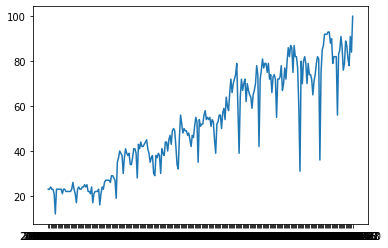

In [68]:
#折れ線グラフ 時系列データに用いる
#google trend 'python' データ
trend = pd.read_csv('multiTimeline.csv',
                    index_col=0,skiprows=1)
print (trend)
#折れ線グラフ
plt.plot(trend)

### PLT.HIST()ヒストグラム

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

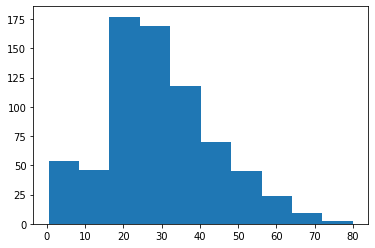

In [69]:
#タイタニック号 年齢分布
plt.hist(df.Age)

### PLT.SCATTER() 散布図

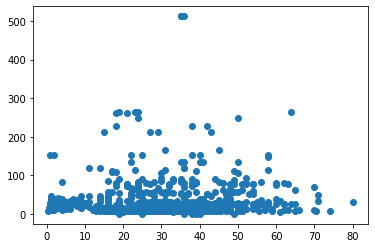

In [70]:
#x軸Age y軸Fare
plt.scatter(df.Age,df.Fare)

### PLT.BAR() 縦棒

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<BarContainer object of 2 artists>

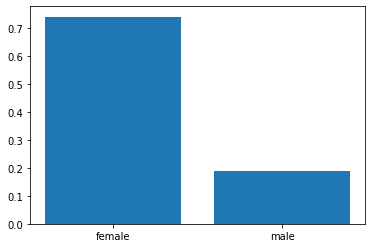

In [71]:
#性別ごとの生存率
mean = df.groupby('Sex')['Survived'].mean()
print (mean)
#最初の引数にインデックスを指定、次の引数にmeanの値を指定
plt.bar(mean.index,mean)

### PLT.BARH() 横棒

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


<BarContainer object of 2 artists>

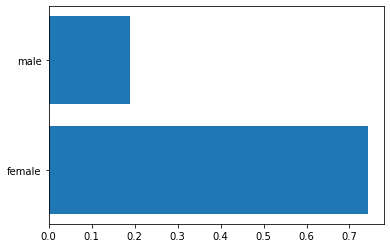

In [72]:
#性別ごとの生存率
mean = df.groupby('Sex')['Survived'].mean()
print (mean)
#最初の引数にインデックスを指定、次の引数にmeanの値を指定
plt.barh(mean.index,mean)


### PLT.BOXPLOT()

{'boxes': [<matplotlib.lines.Line2D at 0x7fdce78c3278>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdce78c3ac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdce784e4e0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdce784e198>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdce78c33c8>,
  <matplotlib.lines.Line2D at 0x7fdce78c3780>]}

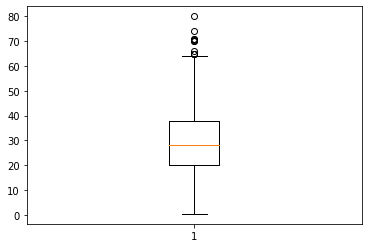

In [73]:
#Ageの分布を確認 (欠損があるとうまくいかないので欠損落とす))
plt.boxplot(df.Age.dropna())

## 4.2 複数のグラフを書く

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

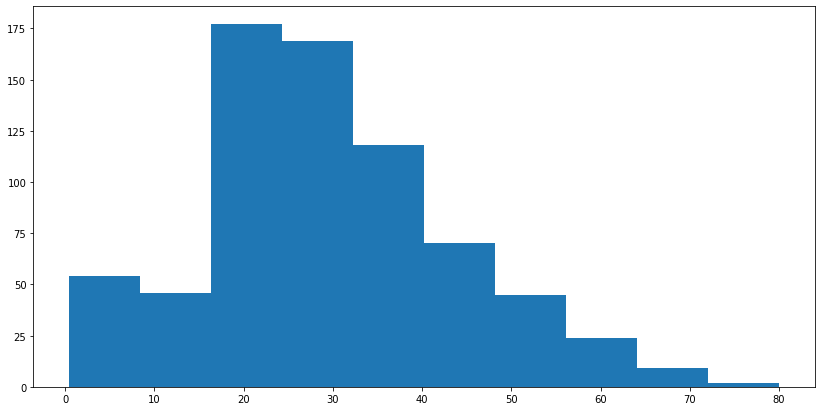

In [74]:
#figure作成
plt.figure(figsize=(14,7)) #サイズを指定

#1つのグラフを書く
#タイタニック号 年齢分布
plt.hist(df.Age)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

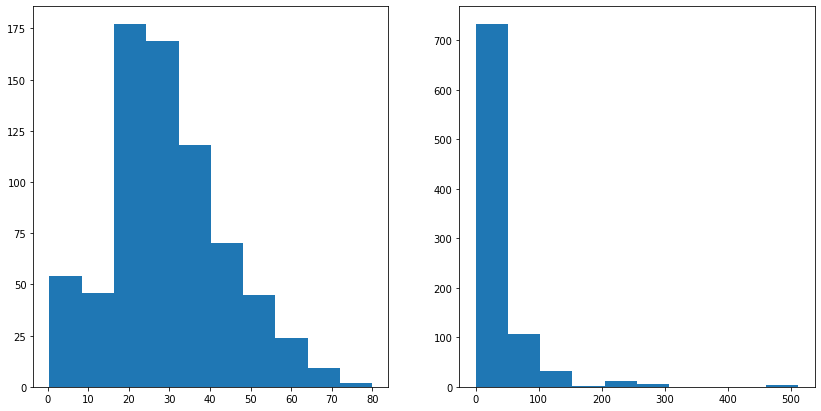

In [75]:
#2つ書く
plt.figure(figsize=(14,7))
plt.subplot(1,2,1) #1行2列の1番目
#Ageヒストグラム
plt.hist(df.Age)

plt.subplot(1,2,2) #1行2列の1番目
#Fareヒストグラム
plt.hist(df.Fare)

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


{'boxes': [<matplotlib.lines.Line2D at 0x7fdce75cb5f8>],
 'caps': [<matplotlib.lines.Line2D at 0x7fdce75cbe48>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdce75d7860>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fdce75d7518>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fdce75cb748>,
  <matplotlib.lines.Line2D at 0x7fdce75cbb00>]}

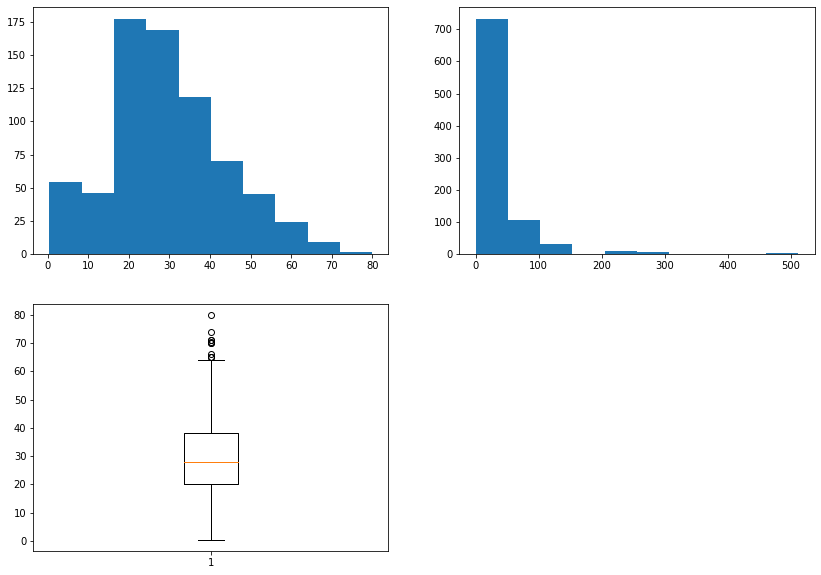

In [76]:
#3つ書く
plt.figure(figsize=(14,10))

plt.subplot(2,2,1) #2行2列の1番目
#Ageヒストグラム
plt.hist(df.Age)

plt.subplot(2,2,2) #2行2列の2番目
#Fareヒストグラム
plt.hist(df.Fare)

plt.subplot(2,2,3) #2行2列の3番目
#Ageboxplot 
plt.boxplot(df.Age.dropna())

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([36., 19., 63., 65., 52., 24., 21.,  9.,  0.,  1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

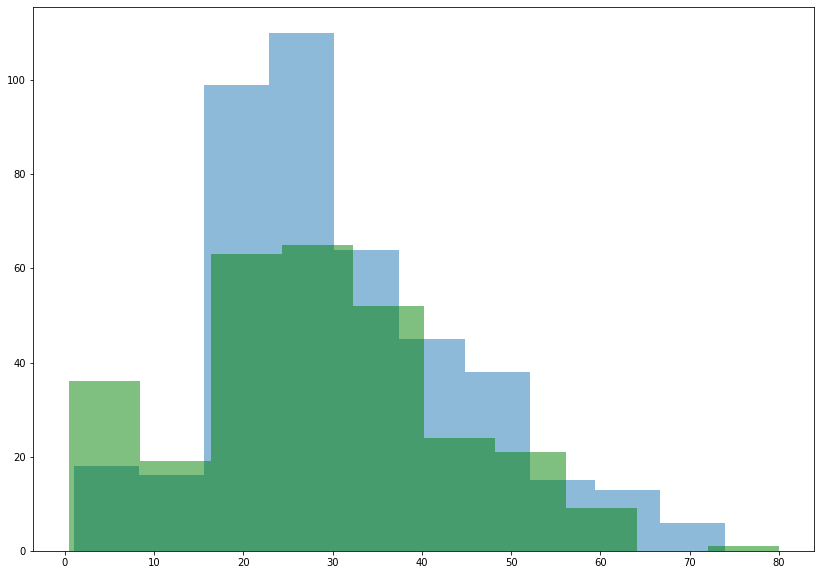

In [77]:
plt.figure(figsize=(14,10))
#生存者/死亡者
bools = df['Survived']==0
#死亡者ヒストグラム
plt.hist(df[bools].Age,alpha=0.5)
#生存者ヒストグラム
plt.hist(df[~bools].Age,color='green',alpha=0.5) #緑いろ

## 4.3 その他調整

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
No handles with labels found to put in legend.


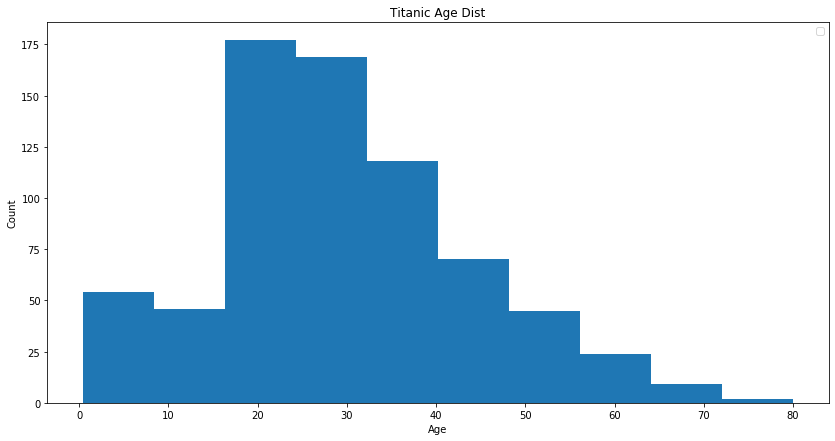

In [80]:
#figure作成
plt.figure(figsize=(14,7)) #サイズを指定

#1つのグラフを書く
#タイタニック号 年齢分布
plt.hist(df.Age)

#title作成
plt.title('Titanic Age Dist')

#x軸ラベル
plt.xlabel('Age')

#y軸ラベル
plt.ylabel('Count')
plt.legend()

### 実務への応用

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


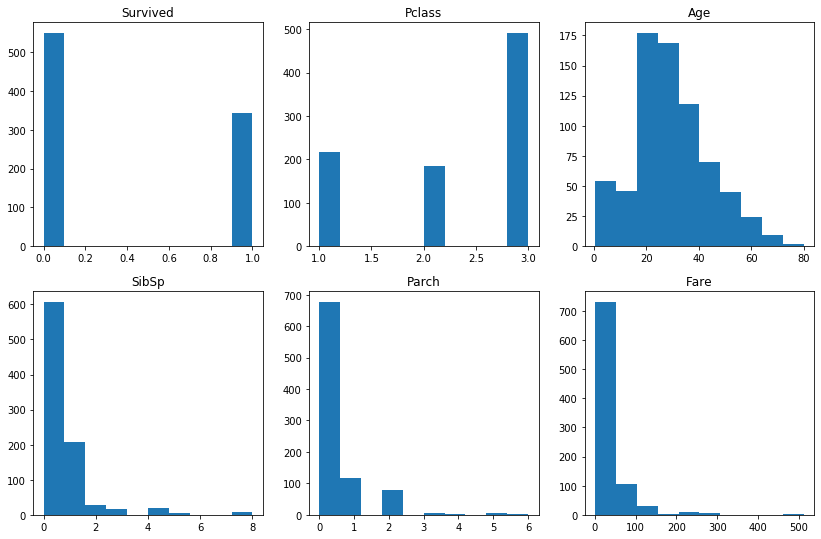

In [81]:
#応用データフレームの数値変数全体のヒストグラムを書く
cols = list(df.dtypes[df.dtypes!='object'].index)
#PassengerId不要なので除く
cols.remove('PassengerId')

plt.figure(figsize=(14,14))
#enumerateを使用すると、iにループ回数が入る
for i,col in enumerate(cols):
  #3行3列でsubplot作成
  plt.subplot(3,3,i+1)
  plt.hist(df[col])
  plt.title(col)